In [3]:
import numpy as np

In [4]:
def jacobi(A, b, max_iterations=10, verbose=True):
    x = np.ones(len(b))
    n_iter = 0
    residuals = []
    N = A - np.diag(np.diagonal(A))
    while (n_iter <= max_iterations):
        x_old  = x.copy()
        if (verbose == True):
          print("Iteration ", n_iter, ": x = ", x_old)
        x[:] = (b - np.dot(N, x)) / np.diagonal(A)
        n_iter += 1
        residual = np.linalg.norm( b - np.dot(A,x) , 2)
        residuals.append(residual)
    return x, residuals

In [5]:
def gauss_seidel(A, b, max_iterations=10, verbose=True):
    x = np.zeros_like(b)
    n_iter = 0
    residuals = []
    while (n_iter <= max_iterations):
        x_old  = x.copy()
        if (verbose == True):
          print("Iteration ", n_iter, ": x = ", x_old)
        for i in range(A.shape[0]):
            x[i] = -(np.dot(A[i,:i], x[:i]) + np.dot(A[i,(i+1):], x_old[(i+1):]) - b[i]) / A[i ,i]
        n_iter += 1
        residual = np.linalg.norm( b - np.dot(A,x) , 2)
        residuals.append(residual)
    return x, residuals

In [8]:
#n = 20
#A = np.diag(-1*np.ones(n-1), -1) + np.diag(2*np.ones(n), 0) + np.diag(-1*np.ones(n-1), 1)
#b = np.ones(n)
n = 3
A = np.array([[7.,3., 1], [-3., 10., 2.], [1., 7., -15.]])
b = np.array([3., 4. ,2.])
print(A)
iter = 500
xJ, residualsJ = jacobi(A,b, iter, False)
xG, residualsG = gauss_seidel(A,b, iter, False)

[[  7.   3.   1.]
 [ -3.  10.   2.]
 [  1.   7. -15.]]


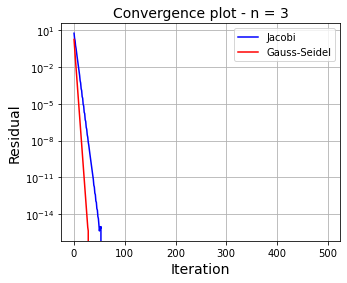

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))

# Plot the log of the residual
# against iteration number 
plt.semilogy(residualsJ, color="blue", label="Jacobi")
plt.semilogy(residualsG, color="red", label="Gauss-Seidel")
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.title('Convergence plot - n = %s' %(n), fontsize=14)
plt.legend()
plt.grid()
plt.show()